# Project 1: Customer Churn Prediction in a Subscription-Based Service

## Task 1: Exploratory Data Analysis

#### Task 1 summary:

- 7023 customers, 21 features
- dropped customerID for no correlation
- churn rate is 26%, imbalanced dataset
- dummy classifier shows accuracy ~73% so not useful
- churn associated with:
    - short tenure
    - high monthly charges
    - monthly contracts
    - payment by electronic check
    - lack of security or tech support add-ons
    - fiber internet (expensive)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [2]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.nunique().sort_values()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
PhoneService           2
PaperlessBilling       2
Churn                  2
MultipleLines          3
TechSupport            3
StreamingTV            3
OnlineBackup           3
DeviceProtection       3
StreamingMovies        3
Contract               3
OnlineSecurity         3
InternetService        3
PaymentMethod          4
tenure                73
MonthlyCharges      1585
TotalCharges        6531
customerID          7043
dtype: int64

while I'm here, let's drop customerID

In [9]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Plotting Skewness

the TotalCharges column has blank strings we need to fix before we can plot it:

In [10]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"].replace(" ", None), errors="coerce")
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

/tmp/ipykernel_630/242905668.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


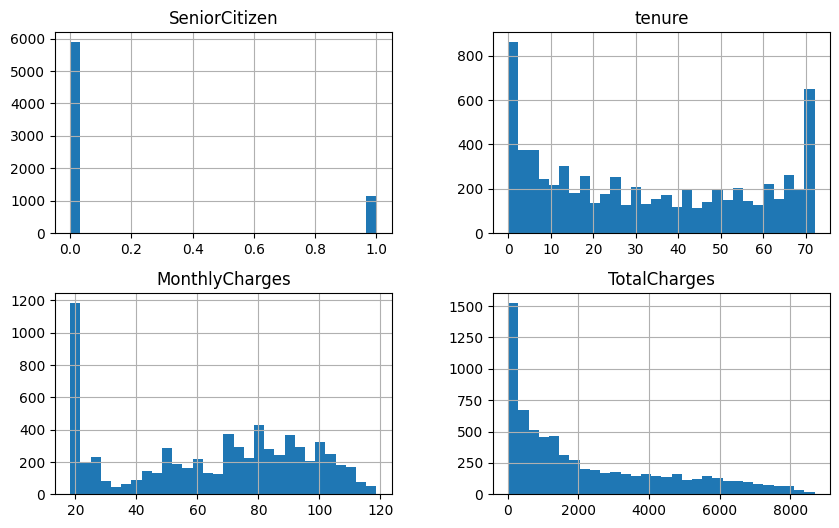

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.963789
dtype: float64

In [11]:
numeric_cols = ["SeniorCitizen", "tenure", "MonthlyCharges", "TotalCharges"]

df[numeric_cols].hist(bins=30, figsize=(10,6))
plt.show()

df[numeric_cols].skew()


### Correlations

need to convert Churn column to 0 and 1

In [12]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

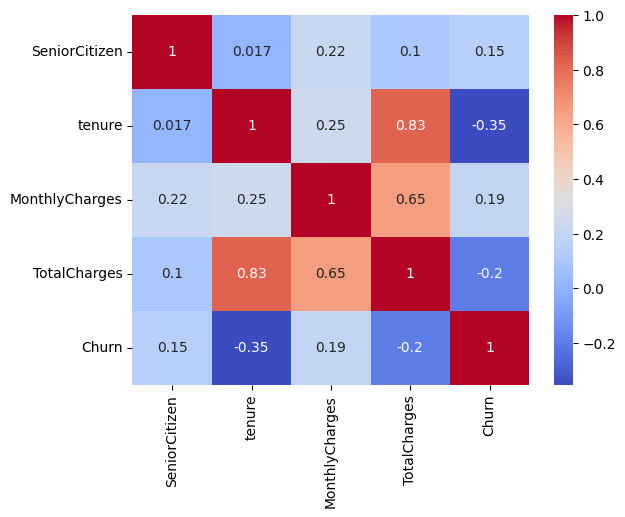

In [13]:
corr = df[numeric_cols + ["Churn"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()


makes sense: short‑tenure customers churn more, and long‑tenure customers have accumulated higher total charges

In [14]:
categorical_cols = [col for col in df.columns 
                    if df[col].dtype == "object" and col not in ["customerID"]]

df[categorical_cols].nunique().sort_values()

for col in categorical_cols:
    print(df[col].value_counts())


gender
Male      3555
Female    3488
Name: count, dtype: int64
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64
StreamingTV
No                     2810
Y

ok so:

gender has a balanced distribution, probably low importance

partner has slightly more no's, more likely to churn if there's no partner

dependents has a lot more no's, more churn from customers WITHOUT dependents

phoneService, most have service

multipleLines, customers with multiple lines might churn less because they're tied to the service

internetService is super important, fiber churn more because of high prices, no internet service customers churn less
    customers with no add-on services to this tend to churn more
    customers with more add-ons tend to churn less because they're tied to the service

contract shows month-to-month customers churn more, but having a longer contract isn't necessarily better than the one year
    but are we sure?

paperlessBilling, skewed towards yes

paymentMethod, electronic check churns the most


low cardinality means we can use one-hot encoding

only high-cardinality column is customerID which we nuked at the start

#### plot the churn woooow

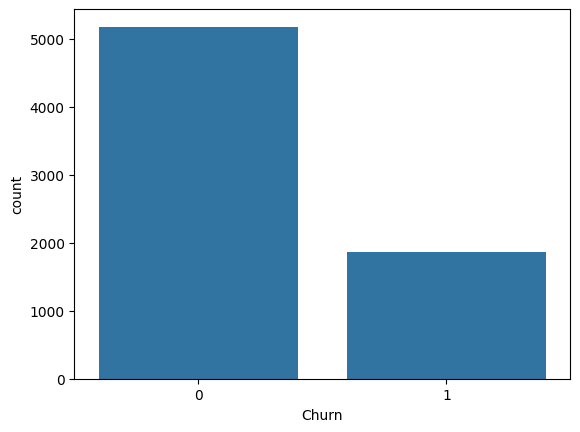

In [15]:
df["Churn"].value_counts(normalize=True)
sns.countplot(data=df, x="Churn")
plt.show()


In [16]:
churn_counts = df["Churn"].value_counts()
churn_rate = churn_counts[1] / churn_counts.sum()

print("churn rate", churn_rate)
print("ratio:", churn_counts[0] / churn_counts[1])

churn rate 0.2653698707936959
ratio: 2.7683253076511503


26% churn rate, 2.7:1 imbalance

churners tend to have low tenure, high monthly charges, and lower total charges (because of the low tenure)

In [17]:
pd.crosstab(df["Contract"], df["Churn"], normalize="index")


Churn,0,1
Contract,,
Month-to-month,0.572903,0.427097
One year,0.887305,0.112695
Two year,0.971681,0.028319


In [18]:
pd.crosstab(df["PaymentMethod"], df["Contract"], values=df["Churn"], aggfunc="mean")


Contract,Month-to-month,One year,Two year
PaymentMethod,,,
Bank transfer (automatic),0.341256,0.097187,0.033688
Credit card (automatic),0.327808,0.103015,0.022375
Electronic check,0.537297,0.184438,0.077381
Mailed check,0.315789,0.068249,0.007853


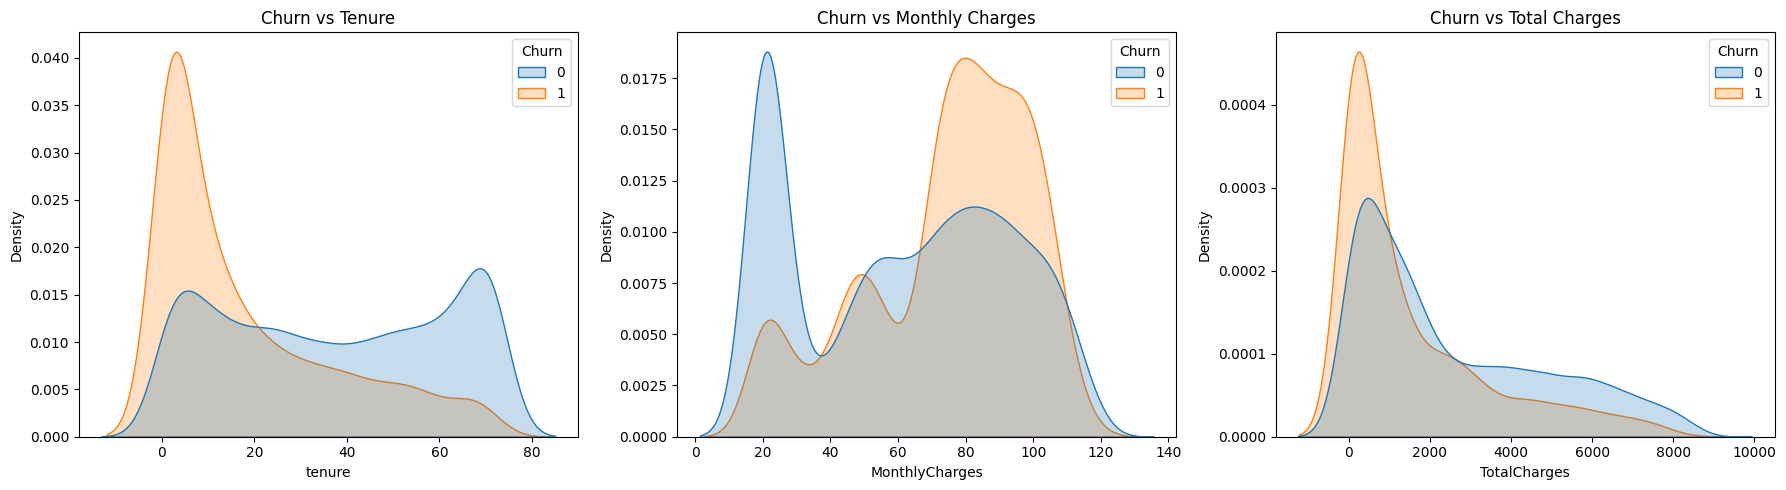

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.kdeplot(data=df, x="tenure", hue="Churn",common_norm=False, fill=True, ax=axes[0])
axes[0].set_title("Churn vs Tenure")

sns.kdeplot(data=df, x="MonthlyCharges", hue="Churn",common_norm=False, fill=True, ax=axes[1])
axes[1].set_title("Churn vs Monthly Charges")

sns.kdeplot(data=df, x="TotalCharges", hue="Churn",common_norm=False, fill=True, ax=axes[2])
axes[2].set_title("Churn vs Total Charges")

plt.tight_layout()
plt.show()


/tmp/ipykernel_630/790601458.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=churn_rate,x=feature,y="Churn",ax=axes[i],palette="viridis")
/tmp/ipykernel_630/790601458.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=churn_rate,x=feature,y="Churn",ax=axes[i],palette="viridis")
/tmp/ipykernel_630/790601458.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=churn_rate,x=feature,y="Churn",ax=axes[i],palette="viridis")
/tmp/ipykernel_630/790601458.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecate

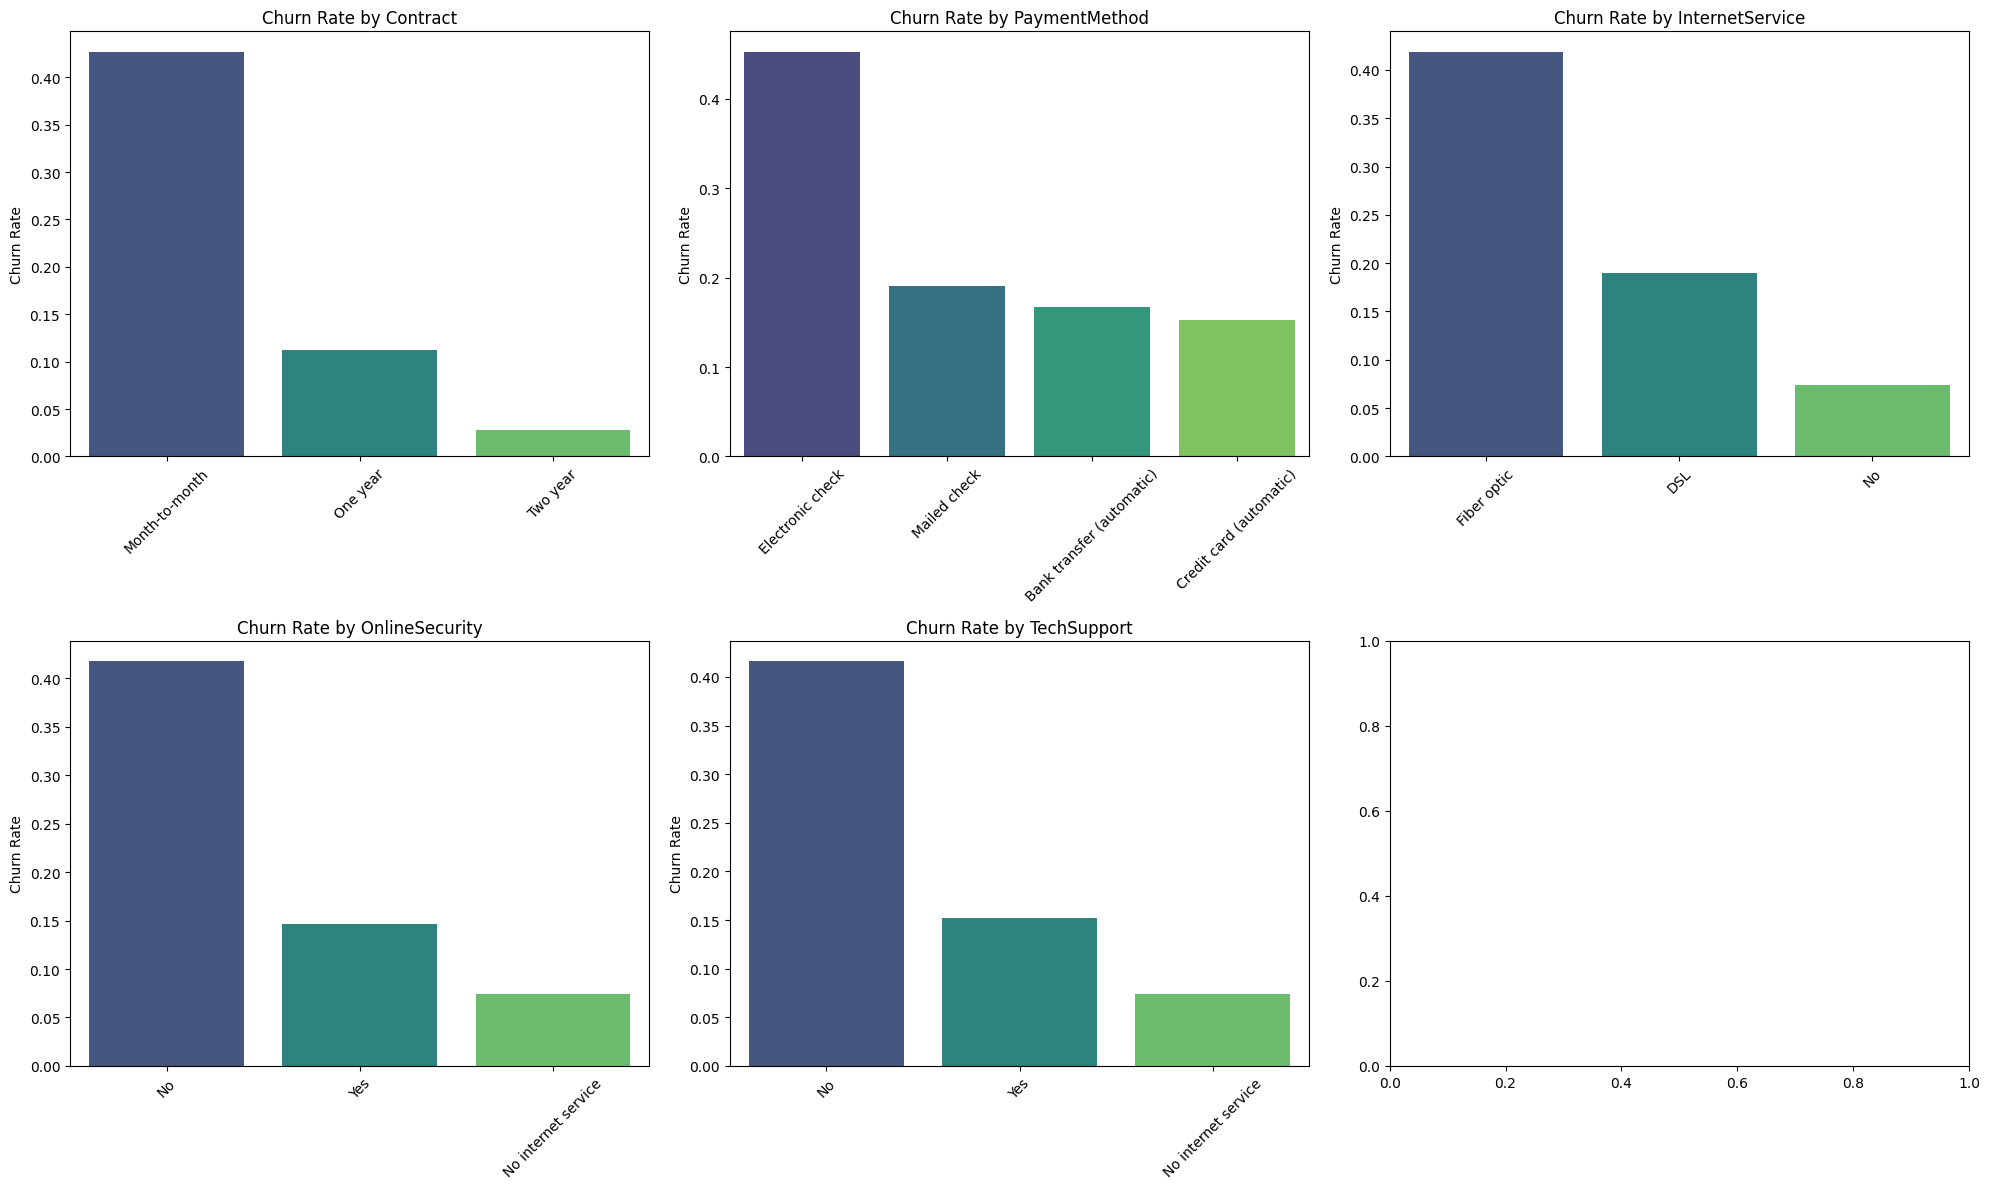

In [20]:
features = ["Contract","PaymentMethod","InternetService","OnlineSecurity","TechSupport"]

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for i, feature in enumerate(features):
    churn_rate = (df.groupby(feature)["Churn"].mean().sort_values(ascending=False).reset_index())

    sns.barplot(data=churn_rate,x=feature,y="Churn",ax=axes[i],palette="viridis")
    
    axes[i].set_title(f"Churn Rate by {feature}")
    axes[i].set_ylabel("Churn Rate")
    axes[i].set_xlabel("")
    axes[i].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()


#### Dummy model

In [21]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)


0.7348097671777399

accuracy: 73%

so accuracy is useless for churn

use precision, recall, F1, ROC AUC, PR AUC

### Visualize missing data

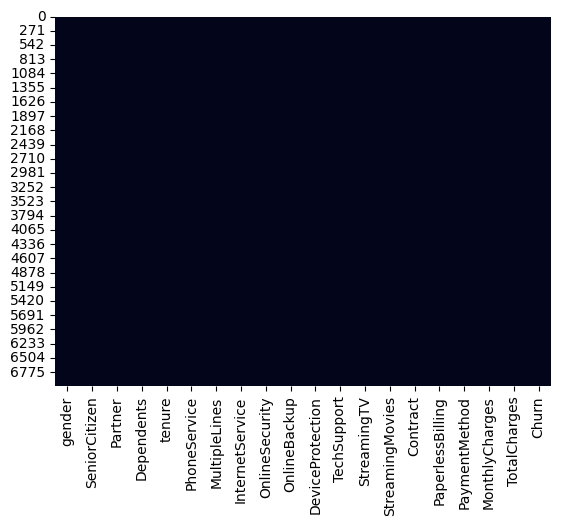

In [22]:
df.isna().sum()

sns.heatmap(df.isna(), cbar=False)
plt.show()


nothing is null, BUT some cells have a blank space ' ' which might be problematic

### Task 1 summary

- 7023 customers, 21 features
- dropped customerID for no correlation
- churn rate is 26%, imbalanced dataset
- dummy classifier shows accuracy ~73% so not useful
- churn associated with:
    - short tenure
    - high monthly charges
    - monthly contracts
    - payment by electronic check
    - lack of security or tech support add-ons
    - fiber internet (expensive)


in case we want to use this:

In [ ]:
# df.to_csv("clean.csv", index=False)

## Task 2: Shallow Learning Approaches

In [29]:
from sklearn.model_selection import train_test_split

X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=13
)

Pre-processing pipeline 1

In [31]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

numeric_features = ["tenure", "MonthlyCharges", "TotalCharges"]
categorical_features = [col for col in X.columns if col not in numeric_features]

numeric_transformer = Pipeline(steps=[
  ("imputer", SimpleImputer(strategy="median")),
  ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
  ("imputer", SimpleImputer(strategy="most_frequent")),
  ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
  transformers=[
      ("num", numeric_transformer, numeric_features),
      ("cat", categorical_transformer, categorical_features)
  ]
)

### Model 1: random forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = Pipeline(steps=[
  ("preprocessor", preprocessor),
  ("model", RandomForestClassifier(random_state=42))
])

rf_params = {
  "model__n_estimators": [200, 400],
  "model__max_depth": [None, 10, 20],
  "model__min_samples_split": [2, 5],
}

rf_grid = GridSearchCV(
  rf, rf_params, cv=5, scoring="f1", n_jobs=-1
)

rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_

In [ ]:
print(rf_grid.best_params_)
print(rf_grid.best_score_)


{'model__max_depth': 10, 'model__min_samples_split': 2, 'model__n_estimators': 400}
0.5605858956756762


In [38]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

y_pred = rf_best.predict(X_test)

print("accuracy:", accuracy_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("confusion matrix:\n", confusion_matrix(y_test, y_pred))


accuracy: 0.8112136266855926
F1: 0.5932721712538226
confusion matrix:
 [[949  86]
 [180 194]]


In [36]:
import pandas as pd

cv_results = pd.DataFrame(rf_grid.cv_results_)
cv_results[[
    "param_model__n_estimators",
    "param_model__max_depth",
    "param_model__min_samples_split",
    "mean_test_score",
    "std_test_score"
]]


,param_model__n_estimators,param_model__max_depth,param_model__min_samples_split,mean_test_score,std_test_score
0,200,None,2,0.535873,0.019754
1,400,None,2,0.533012,0.024748
2,200,None,5,0.550117,0.012838
3,400,None,5,0.548624,0.014212
4,200,10,2,0.557219,0.009453
5,400,10,2,0.560586,0.007790
6,200,10,5,0.553953,0.013383
7,400,10,5,0.559691,0.011262
8,200,20,2,0.539212,0.016173
9,400,20,2,0.535265,0.018955


### Model 2: XGBoost

In [41]:
from xgboost import XGBClassifier

xgb = Pipeline(steps=[
  ("preprocessor", preprocessor),
  ("model", XGBClassifier(
      objective="binary:logistic",
      eval_metric="logloss",
      random_state=42
  ))
])

xgb_params = {
  "model__n_estimators": [200, 400],
  "model__learning_rate": [0.05, 0.1],
  "model__max_depth": [3, 5],
}

xgb_grid = GridSearchCV(
  xgb, xgb_params, cv=5, scoring="f1", n_jobs=-1
)

xgb_grid.fit(X_train, y_train)
xgb_best = xgb_grid.best_estimator_

### Model 3: logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = Pipeline(steps=[
  ("preprocessor", preprocessor),
  ("model", LogisticRegression(max_iter=1000))
])

lr.fit(X_train, y_train)

### Ensemble Learner: Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(
  estimators=[
      ("rf", rf_best),
      ("xgb", xgb_best),
      ("lr", lr)
  ],
  voting="soft"
)

ensemble.fit(X_train, y_train)

### Evaluation (Accuracy, F1, Confusion Matrix)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

def evaluate(model, name):
  y_pred = model.predict(X_test)
  print(f"\n=== {name} ===")
  print("Accuracy:", accuracy_score(y_test, y_pred))
  print("F1 Score:", f1_score(y_test, y_pred))
  print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))

evaluate(rf_best, "Random Forest")
evaluate(xgb_best, "XGBoost")
evaluate(lr, "Logistic Regression")
evaluate(ensemble, "Ensemble")

## Task 3: Neural Network Models

At this point, I'm mostly just using what Tariq gave us, haven't spent too much time here

In [ ]:
X_train_nn = preprocessor.fit_transform(X_train)
X_test_nn = preprocessor.transform(X_test)

X_train_nn = X_train_nn.toarray()
X_test_nn = X_test_nn.toarray()

y_train_nn = y_train.values
y_test_nn = y_test.values

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers

input_dim = X_train_nn.shape[1]

model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(input_dim,)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l2(1e-4)),
    layers.Dropout(0.3),

    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

Early stopping

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)


In [ ]:
history = model.fit(
    X_train_nn, y_train_nn,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Plotting

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


## Task 4: Model Comparison & Interpretability

we could make a table to compare the results like so:

In [ ]:
import pandas as pd

results = pd.DataFrame({
    "Model": ["Random Forest", "Gradient Boosting", "Logistic Regression",
              "FFNN", "AE + RF", "AE + FFNN"],
    "Accuracy": [...],
    "F1": [...],
    "ROC-AUC": [...],
})
results

error checking:

In [ ]:
y_pred = best_model.predict(X_test_nn)
errors = X_test.copy()
errors["true"] = y_test.values
errors["pred"] = y_pred
errors["error"] = errors["true"] != errors["pred"]

false negatives as missed churners:

In [ ]:
false_negatives = errors[(errors["true"] == 1) & (errors["pred"] == 0)]
false_negatives.head()


or false positives:

In [ ]:
false_positives = errors[(errors["true"] == 0) & (errors["pred"] == 1)]
false_positives.head()


### SHAP

In [ ]:
import shap

# trees:
explainer = shap.TreeExplainer(rf_best.best_estimator_.named_steps["model"])
shap_values = explainer.shap_values(preprocessor.transform(X_test))


# neural networks:
# explainer = shap.KernelExplainer(model.predict, X_train_nn[:200])
# shap_values = explainer.shap_values(X_test_nn[:200])


feature importance:

In [ ]:
shap.summary_plot(shap_values, preprocessor.transform(X_test))

local explanations

In [ ]:
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])